In [1]:
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3

In [2]:
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins

list_stage_plugins("routing")

['legacy_sabre', 'basic', 'lookahead', 'none', 'sabre', 'stochastic']

In [3]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("speedups.txt")

In [4]:
coupling_map = CouplingMap.from_line(32)
transpilers = [
    # SabreMS(
    #     coupling_map, use_fast_settings=False, name="SABREMS-SlowSerial", parallel=False
    # ),
    # SabreMS(
    #     coupling_map, use_fast_settings=True, name="SABREMS-FastSerial", parallel=False
    # ),
    SabreMS(
        coupling_map,
        use_fast_settings=False,
        name="SABREMS-SlowParallel",
        parallel=True,
    ),
    SabreMS(
        coupling_map, use_fast_settings=True, name="SABREMS-FastParallel", parallel=True
    ),
    QiskitLevel3(coupling_map, python_sabre=True),
]

In [5]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    num_runs=1,
)
benchmark.run()

Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]

Loading qft_n4 from QASMBench
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 3.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:  25%|██▌       | 1/4 [00:07<00:23,  7.68s/it]

Loading qft_n8 from MQTBench


Circuits from library:  50%|█████     | 2/4 [00:15<00:15,  7.62s/it]

Loading qft_n16 from MQTBench


Circuits from library:  75%|███████▌  | 3/4 [00:32<00:11, 11.83s/it]

Loading qft_n32 from MQTBench


Circuits from library: 100%|██████████| 4/4 [01:26<00:00, 21.66s/it]


In [6]:
benchmark.summary_statistics(transpilers[0], transpilers[2])

{'total_runtime': {'average_change': -93.72458985006324,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n32'}}

In [7]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'total_runtime': {'average_change': -92.47039788994245,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n32'}}

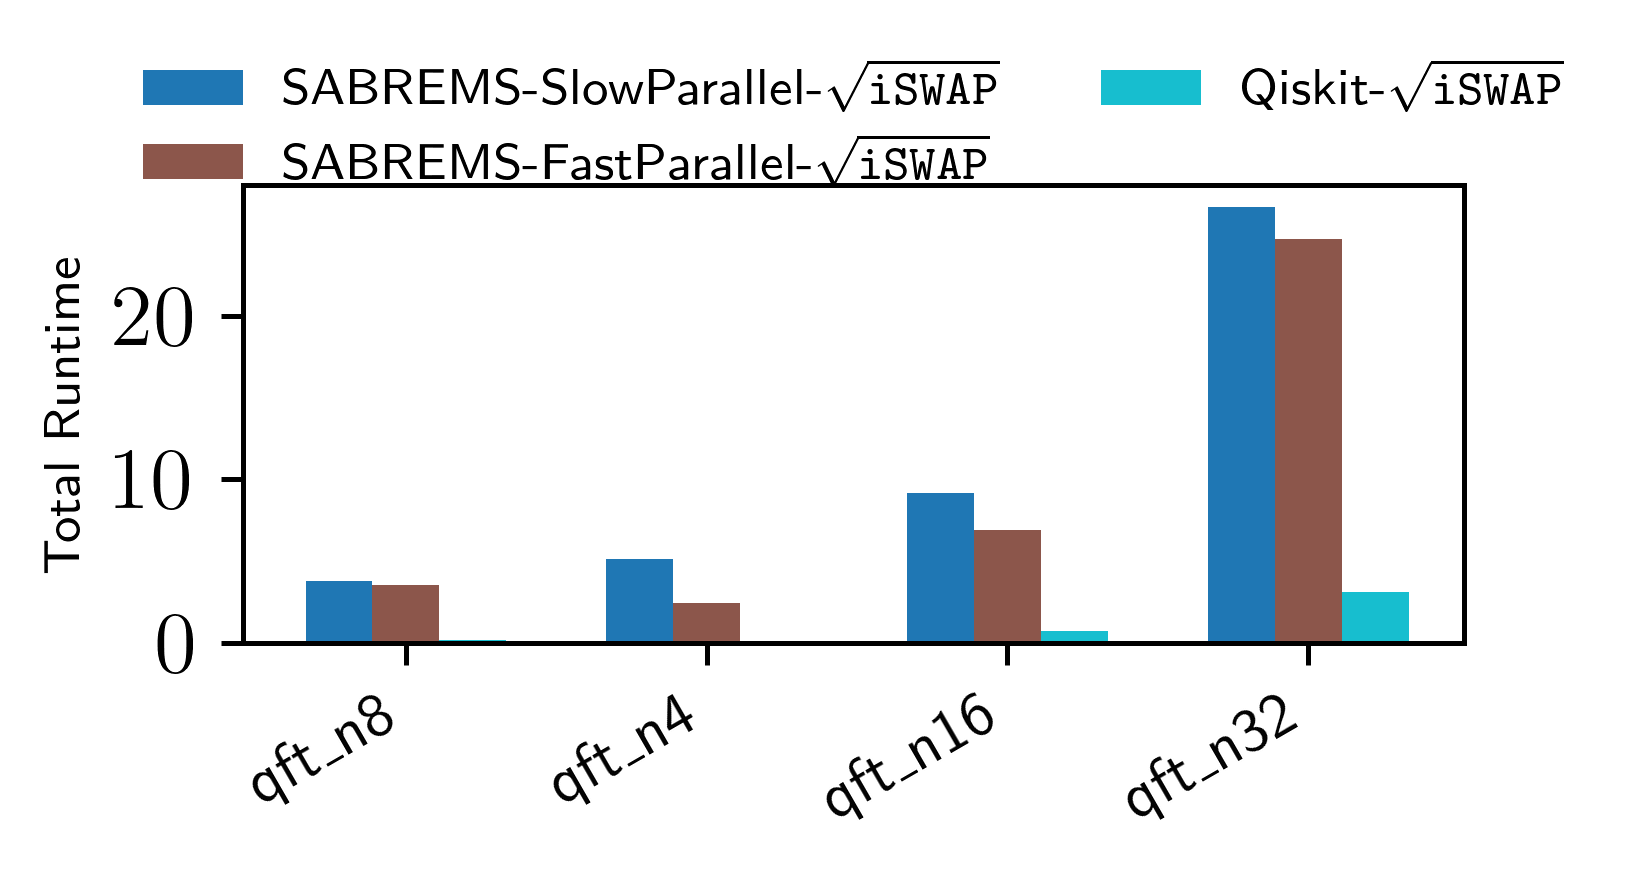

In [8]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="speed")